# Kunskapskontroll 1 

### Fyll i uppgifterna nedan (obligatoriskt för att bli godkänd) innan du lämnar in på Omniway: 
Namn: Ali Hamza

Datum då du presenterade ditt arbete på lektionen: -

Presenterade du inte det på lektionen, skriv vem du har diskuterat igenom koden med: Quang Tri Tran

# Task

As a data analyst there is plenty of opportunity to improve processes or suggest improved ways of doing things. When doing so it is often very smart and efficient (time is a scarce resource) to create a POC (Proof of Concept) which basically is a small demo checking wether it is worthwile going further with something. It is also something concrete which facilitates discussions, do not underestimate the power of that. 

In this example, you are working in a company that sells houses and they have a "manual" process of setting prices by humans. You as a Data Scientist can make this process better by using Machine Learning. Your task is to create a POC that you will present to your team colleagues and use as a source of discussion of wether or not you should continue with more detailed modelling. 

Two quotes to facilitate your reflection on the value of creating a PoC: 

"*Premature optimization is the root of all evil*". 

"*Fail fast*".


**More specifially, do the following:**
1. A short EDA (Exploratory Data Analysis) of the housing data set.
2. Drop the column "ocean_proximity", then you only have numeric columns which will simplify your analysis. Remember, this is a POC!
3. Split your data into train and test set.
4. You have missing values in your data. Handle this with [ SimpleImputer(strategy="median") ], check the fantastic Scikit-learn documentation for details.
5. Create one "Linear Regression" model and one "Lasso" model. For the Lasso model, use GridSearchCV to optimize $\alpha$ values, choose yourself which $\alpha$ values to evaluate.
Use RMSE as a metric to decide which model to choose. 

7. Evaluate your chosen model on the test set using the root mean squared error (RMSE) as the metric. Conclusions? 

8. Do a short presentation (~ 2-5 min) on your POC that you present to your colleagues (no need to prepare anything particular, just talk from the code). Think of:
- What do you want to highlight/present?
- What is your conclusion?
- What could be the next step? Is the POC convincing enough or is it not worthwile continuing? Do we need to dig deeper into this before taking some decisions?

# Code

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [43]:
# Below, set your own path where you have stored the data file. 
housing = pd.read_csv(r'C:\Users\ali_h\Downloads\housing.csv')

In [44]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## EDA

Number of rows: 20640
Number of columns: 9
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0  
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20

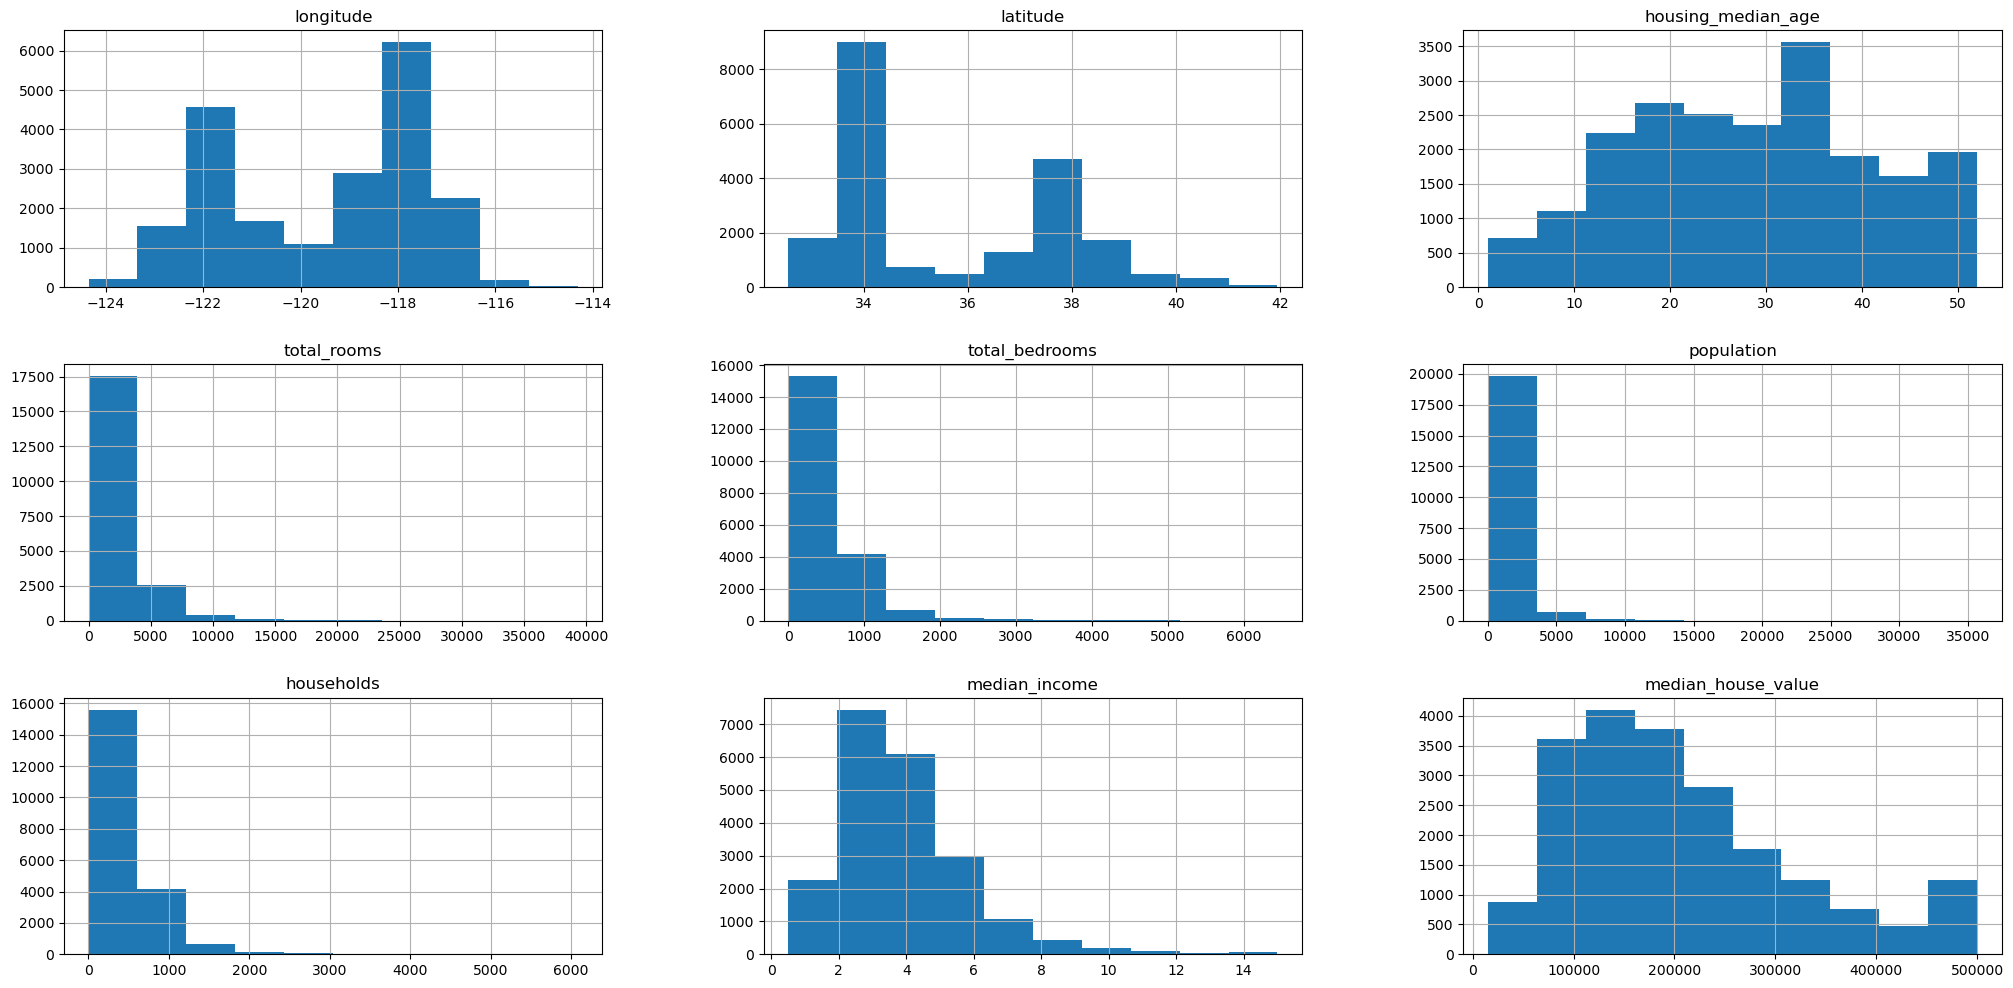

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [111]:
#This line prints the number of rows in the df housing.
print("Number of rows:", housing.shape[0])

#This line works as the previous line, but prints the number of columns in the df housing.
print("Number of columns:", housing.shape[1])

#Displays first 5 rows of 'housing', but he first 5 rows is by default as long as I dont change the value inside().
print(housing.head())

#This line sums the statistics of the numerical values such as mean, median, etc.
print(housing.describe())

#This line gives an understanding of the df housing.
print(housing.info())

#This line prints out the number of missing values for each column.
print("Missing values:\n", housing.isnull().sum())

#This line prints out the histogram according to a given figure size.
housing.hist(figsize=(25, 12))

#This line plots and shows the image of the histogram.
plt.show()

#This line is a type of a statistic measure that measures the relations between pairs of variables.
correlation_matrix = housing.corr()

#This line prints out the results of the measurements.
print(correlation_matrix)



In [85]:
#To deal with the BAY error, we use drop.
housing.drop("ocean_proximity", axis=1, inplace=True)

KeyError: "['ocean_proximity'] not found in axis"

In [108]:
#This line basically places all columns but dropping the column 'population', makes it unrelated to the x variable.
x = housing.drop(columns =['population'])
#This line targets a specific column, in this case population.
y = y = housing['population']
#In this line I have created x & y variables in which will be used for the train and the test.
#In this case the test_size = 0.2, determines the 20% testing value.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print("Training set - Features:", x_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", x_test.shape, "Target:", y_test.shape)

#Prints out the dimensions.
print(x.shape)
print(y.shape)

#Prints out if the process was correct and without errors.
print(x_train.shape[0]/x.shape[0])
print(x_test.shape[0]/x.shape[0])

Training set - Features: (16512, 8) Target: (16512,)
Testing set - Features: (4128, 8) Target: (4128,)
(20640, 8)
(20640,)
0.8
0.2


In [139]:
#So what I basically want to do here, is that I want to replace missing values in columns with the median value.

#The imputer now contains the median value.
imputer = SimpleImputer(strategy='median')

#Now I am going to fit the imputer on the traning data and transform it.
x_train_imputed = imputer.fit_transform(x_train)

#Then transform the testing data.
x_test_imputed = imputer.transform(x_test)

#Prints out if there are any missing values.
print("Missing values:\n", x_train_imputed.isnull().sum())

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [157]:
#The model of the Linear Regression:
linreg = LinearRegression()
#This is the where the Linear Regression scores gets "stocked" as negative using cross_val_score, the more negative values the better the result.
linreg_scores = cross_val_score(linreg, x_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
#This will be the judge of if the modell is usable or not.
linreg_rmses = np.sqrt(-linreg_scores)
print(f'Average Linear Regression RMSE: {np.mean(linreg_rmses)}')

Average Linear Regression RMSE: 435.6650501366754


In [159]:
#The model of the Lasso:
las_model = Lasso()
lasso = Lasso()

#Parameters
params = {
    'alpha': [1, 10, 41, 50]
}
#The GridSerachCV of the lasso, parameters and the cross validation, which in this case is 5 by default.
lasso_reg = GridSearchCV(lasso, params, cv=5)
#In this line we fit the imputer inside the variables.
lasso_reg.fit(x_train_imputed, y_train)
#Here we print out the result in which alpha chooses as best value.
print(lasso_reg.best_params_)


#Here we basically do the same thing as was done to the Linear Regression, scores get stocked as negative values etc.
lasso_reg_scores = cross_val_score(lasso_reg, x_train_imputed, y_train, cv=3, scoring='neg_mean_squared_error')
#This line checks if the model is useable or not.
lasso_reg_rmses = np.sqrt(-lasso_reg_scores)
print(f'Average Lasso RMSE: {np.mean(lasso_reg_rmses)}')

{'alpha': 1}
Average Lasso RMSE: 436.86930432028475


My lasso RMSE is not much more higher then my linear regression RMSE, might be because of the values in the population column.

Final:
    I can see that my coding and choise of a column with lower values have made the Lasso and Linear regression RMSE values
    comparable by about 1.3, which is so low that it is hard for me making a consumption on the strength of the Lasso according     to the value recieved by the Linear regression.
    
    I have discussed this with my classmate Quan and he also agrees but it seems like values are the main "issue" in this      coding.
    
    